Load Dataset<br> Wages : upah.csv <br> Living Cost : upah.csv <br> Minimum Wages : ump.csv

In [1]:
import pandas as pd
import numpy as np

# Load Living Cost File
df = pd.read_csv("peng.csv")

# Filter column those containing 'perdesaanperkotaan.total'
filtered_columns = ['provinsi'] + [col for col in df.columns if 'peng.perdesaanperkotaan.total' in col]

# Select only the filtered columns
df_filtered = df[filtered_columns]

# Remove 'peng.perdesaanperkotaan.total.' from column names and keep only the year
df_filtered.columns = df_filtered.columns.str.replace('peng.perdesaanperkotaan.total.', '')

# Replace 'NA' with NaN
df_filtered.replace('NA', np.nan, inplace=True)

# Melt the dataset to reshape it
df_melted = pd.melt(df_filtered, id_vars=['provinsi'], var_name='year', value_name='pengeluaran')

# Filter out rows where provinsi is 'INDONESIA'
df_melted = df_melted[df_melted['provinsi'] != 'INDONESIA']

# Convert 'year' column to numeric type
df_melted['year'] = pd.to_numeric(df_melted['year'])

# Drop rows with missing values
df_melted.dropna(inplace=True)

# Sort the DataFrame by 'provinsi' column
df_sorted = df_melted.sort_values(by=['provinsi', 'year'])

# save new cleaned csv
df_sorted .to_csv("peng_cleaned.csv", index=False)

<ipython-input-1-b8b72acb8d8c>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df_filtered.columns = df_filtered.columns.str.replace('peng.perdesaanperkotaan.total.', '')
<ipython-input-1-b8b72acb8d8c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.replace('NA', np.nan, inplace=True)


In [2]:
import pandas as pd
import numpy as np

# Load Wages File
df = pd.read_csv("upah.csv")

# remove string "upah." from header
df.columns = df.columns.str.replace('upah.', '')

# Replace 'NA' with NaN
df.replace('NA', np.nan, inplace=True)

# Reshape Dataset
df_melted = pd.melt(df, id_vars=['provinsi'], var_name='year', value_name='upah')

# Remove rows where provinsi is 'INDONESIA'
df_melted = df_melted[df_melted['provinsi'] != 'INDONESIA']

# Convert 'year' column to numeric type
df_melted['year'] = pd.to_numeric(df_melted['year'])

# Drop rows with missing values
df_melted.dropna(inplace=True)

# Sort the DataFrame by 'provinsi' column
df_sorted = df_melted.sort_values(by=['provinsi', 'year'])

# save new cleaned csv
df_sorted.to_csv("upah_cleaned.csv", index=False)

<ipython-input-2-a1b5ed9b948d>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('upah.', '')


In [3]:
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv("ump.csv")
## NOTE : UMP Jakarta 2021 salah
# remove string "ump." from header
df.columns = df.columns.str.replace('ump.', '')

# Replace 'NA' with NaN
df.replace('NA', np.nan, inplace=True)

# Melt the dataset to reshape it
df_melted = pd.melt(df, id_vars=['provinsi'], var_name='year', value_name='ump')

# Convert 'year' column to numeric type
df_melted['year'] = pd.to_numeric(df_melted['year'])

# Filter out rows where provinsi is 'INDONESIA'
df_melted = df_melted[df_melted['provinsi'] != 'INDONESIA']

# Drop rows with missing values
df_melted.dropna(inplace=True)

# Sort the DataFrame by 'provinsi' column
df_sorted = df_melted.sort_values(by=['provinsi', 'year'])


# save new csv
df_sorted.to_csv("ump_cleaned.csv", index=False)

<ipython-input-3-52f755892242>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('ump.', '')


Check data to find if there is huge disparity between each year

In [4]:
import pandas as pd
import numpy as np

# Load the cleaned living cost csv
pengeluaran_df = pd.read_csv('peng_cleaned.csv')

# Sort the DataFrame by 'provinsi' and 'year'
pengeluaran_df_sorted = pengeluaran_df.sort_values(by=['provinsi', 'year'])

# Calculate the absolute difference between consecutive years within each province
pengeluaran_df_sorted['pengeluaran_diff'] = pengeluaran_df_sorted.groupby('provinsi')['pengeluaran'].diff()

# Calculate the percentage difference between consecutive years
pengeluaran_df_sorted['pengeluaran_diff_percent'] = pengeluaran_df_sorted['pengeluaran_diff'] / pengeluaran_df_sorted['pengeluaran'] * 100

# Check if the percentage difference is more than 20%
problematic_rows = pengeluaran_df_sorted[(pengeluaran_df_sorted['pengeluaran_diff_percent'].abs() > 20) & (pengeluaran_df_sorted['year'] > 2015) & (pengeluaran_df_sorted['year'] <= 2022)]

if problematic_rows.empty:
    print("No significant discrepancies found between consecutive years from 2015 to 2022.")
else:
    print("Significant discrepancies found:")
    print(problematic_rows)

No significant discrepancies found between consecutive years from 2015 to 2022.


In [5]:
import pandas as pd

# Load the cleaned living cost data
pengeluaran_df = pd.read_csv('peng_cleaned.csv')

# Sort the DataFrame by 'provinsi' and 'year'
pengeluaran_df_sorted = pengeluaran_df.sort_values(by=['provinsi', 'year'])

# Calculate the percentage difference between consecutive years
pengeluaran_df_sorted['pengeluaran_diff'] = pengeluaran_df_sorted.groupby('provinsi')['pengeluaran'].diff()

# Calculate the percentage increase for each province between consecutive years
pengeluaran_df_sorted['pengeluaran_diff_percent'] = (pengeluaran_df_sorted['pengeluaran_diff'] / pengeluaran_df_sorted['pengeluaran'].shift()) * 100

# Filter data for the historical period (2015-2021)
historical_data = pengeluaran_df_sorted[pengeluaran_df_sorted['year'].between(2015, 2021)]

# Calculate the average percentage increase for each province over the historical period
historical_avg_increase = historical_data.groupby('provinsi')['pengeluaran_diff_percent'].mean()

# Calculate the standard deviation of percentage increases for each province over the historical period
historical_std_dev = historical_data.groupby('provinsi')['pengeluaran_diff_percent'].std()

# Set a threshold for detecting significant discrepancies (e.g., 2 standard deviations from the mean)
threshold = historical_avg_increase + 2 * historical_std_dev

# Merge the threshold with the original DataFrame
pengeluaran_df_sorted = pengeluaran_df_sorted.merge(threshold, on='provinsi', suffixes=('', '_threshold'))

# Filter the data for the years 2016-2022 to identify significant discrepancies
significant_discrepancies = pengeluaran_df_sorted[(pengeluaran_df_sorted['year'] > 2015) & (pengeluaran_df_sorted['year'] <= 2022) &
                                                 (pengeluaran_df_sorted['pengeluaran_diff_percent'].abs() > pengeluaran_df_sorted['pengeluaran_diff_percent_threshold'])]

# Print significant discrepancies
if significant_discrepancies.empty:
    print("No significant discrepancies found between 2015 and 2022.")
else:
    print("Significant discrepancies found:")
    print(significant_discrepancies)


Significant discrepancies found:
                provinsi  year  pengeluaran  pengeluaran_diff  \
71           DKI JAKARTA  2022    2525347.0          188918.0   
266  NUSA TENGGARA TIMUR  2017     681483.0          104856.0   

     pengeluaran_diff_percent  pengeluaran_diff_percent_threshold  
71                   8.085758                            7.679058  
266                 18.184372                           17.545789  


In [6]:
import pandas as pd

# Load the cleaned minimum wages csv
ump_df = pd.read_csv('ump_cleaned.csv')

# Sort the DataFrame by 'provinsi' and 'year'
ump_df_sorted = ump_df.sort_values(by=['provinsi', 'year'])

# Calculate the absolute difference between consecutive years within each province
ump_df_sorted['ump_diff'] = ump_df_sorted.groupby('provinsi')['ump'].diff()

# Calculate the percentage difference between consecutive years
ump_df_sorted['ump_diff_percent'] = ump_df_sorted['ump_diff'] / ump_df_sorted['ump'] * 100

# Check if the percentage difference is more than 17.19%
problematic_rows = ump_df_sorted[(ump_df_sorted['ump_diff_percent'].abs() > 17.19) & (ump_df_sorted['year'] > 2015) & (ump_df_sorted['year'] <= 2022)]

if problematic_rows.empty:
    print("No significant discrepancies found between 2015 to 2022.")
else:
    print("Significant discrepancies found:")
    print(problematic_rows)


Significant discrepancies found:
               provinsi  year        ump   ump_diff  ump_diff_percent
61               BANTEN  2021  3230023.0   769026.0         23.808685
62               BANTEN  2022  2501203.0  -728820.0        -29.138778
99        DI YOGYAKARTA  2017  1337645.0   349145.0         26.101469
103       DI YOGYAKARTA  2021  2215000.0   510392.0         23.042528
104       DI YOGYAKARTA  2022  1840916.0  -374084.0        -20.320536
124         DKI JAKARTA  2021  1765000.0 -2511350.0       -142.286119
125         DKI JAKARTA  2022  4641854.0  2876854.0         61.976400
145           GORONTALO  2021  4416186.0  1627360.0         36.849897
146           GORONTALO  2022  2800580.0 -1615606.0        -57.688265
182          JAWA BARAT  2016  1312354.0   312354.0         23.801048
187          JAWA BARAT  2021  2630162.0   819811.0         31.169601
188          JAWA BARAT  2022  1841487.0  -788675.0        -42.828160
204         JAWA TENGAH  2017  1367000.0   457000.0      

17.19 is the highest minimum increase between 2015 to 2022 based on 'https://www.liputan6.com/bisnis/read/2371156/5-provinsi-dengan-kenaikan-ump-2016-tertinggi-di-ri' <br>

2021-2022 gives constant disrepancy, after a cross check with https://databoks.katadata.co.id/datapublish/2021/05/01/upah-minimum-yogyakarta-paling-rendah-di-indonesia-pada-2021 <br>
it is confirmed every each of 2021 data is wrong and will be switched to the correct data value


In [7]:
import pandas as pd

# Load the data from a.csv which is the correct data of 2021 and b.csv which contain data of every other year
a_df = pd.read_csv('upah-minimum-provinsi-per-bulan-di-indonesia-(2021).csv')
b_df = pd.read_csv('ump_cleaned.csv')

# Remove the '.' from the 'Nilai' column in a_df and convert it to numeric, handling NaN gracefully
a_df['Nilai'] = a_df['Nilai'].str.replace('.', '', regex=False).fillna(0).astype(int)

# Merge the data from a_df to b_df where year is 2021 and provinsi matches nama data
b_df = b_df.merge(a_df[['Nama Data', 'Nilai']], how='left', left_on='provinsi', right_on='Nama Data')

# Replace the 'upah' values with 'Nilai' where year is 2021
b_df.loc[b_df['year'] == 2021, 'ump'] = b_df['Nilai']

# Drop the unnecessary columns
b_df.drop(columns=['Nama Data', 'Nilai'], inplace=True)

# Save the modified b_df to a new CSV file
b_df.to_csv('ump_cleaned_fixed.csv', index=False)

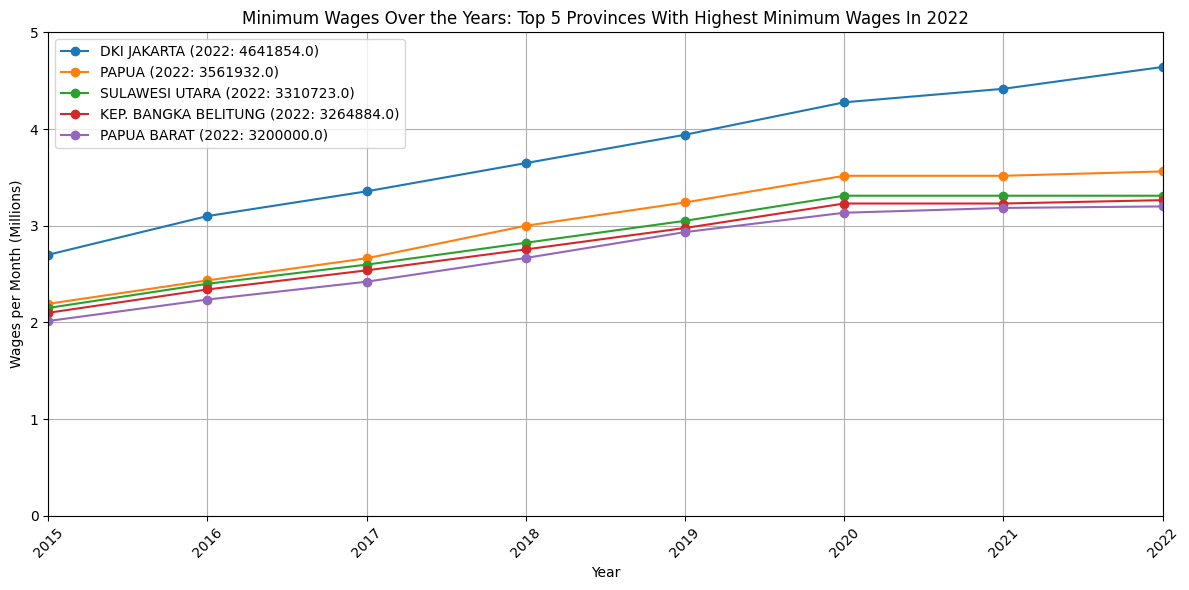

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Minimum Wages csv file
df = pd.read_csv('ump_cleaned_fixed.csv')

# Pivot the data to have years as columns and provinces as rows
pivot_df = df.pivot(index='provinsi', columns='year', values='ump')

# Get the values of 2022 and sort provinces based on them
ump_2022_values = pivot_df[2022].sort_values(ascending=False)

# Get the top 5 provinces with the highest values in 2022
top_5 = ump_2022_values.head(5)

# Plotting
plt.figure(figsize=(12, 6))

# Plotting top 5 provinces with the highest values in 2022
for province, value in top_5.items():
    plt.plot(pivot_df.columns, pivot_df.loc[province] / 1000000, marker='o', label=f"{province} (2022: {value})")

plt.title('Minimum Wages Over the Years: Top 5 Provinces With Highest Minimum Wages In 2022')
plt.xlabel('Year')
plt.ylabel('Wages per Month (Millions)')
plt.xticks(range(2015, 2023), rotation=45)  # Start from year 2015
plt.xlim(2015, 2022)  # Limit the data to start from 2015
plt.legend()
plt.grid(True)

# Set the y-axis limit to 5 million
plt.ylim(0, 5)

plt.tight_layout()

# Show plot
plt.show()

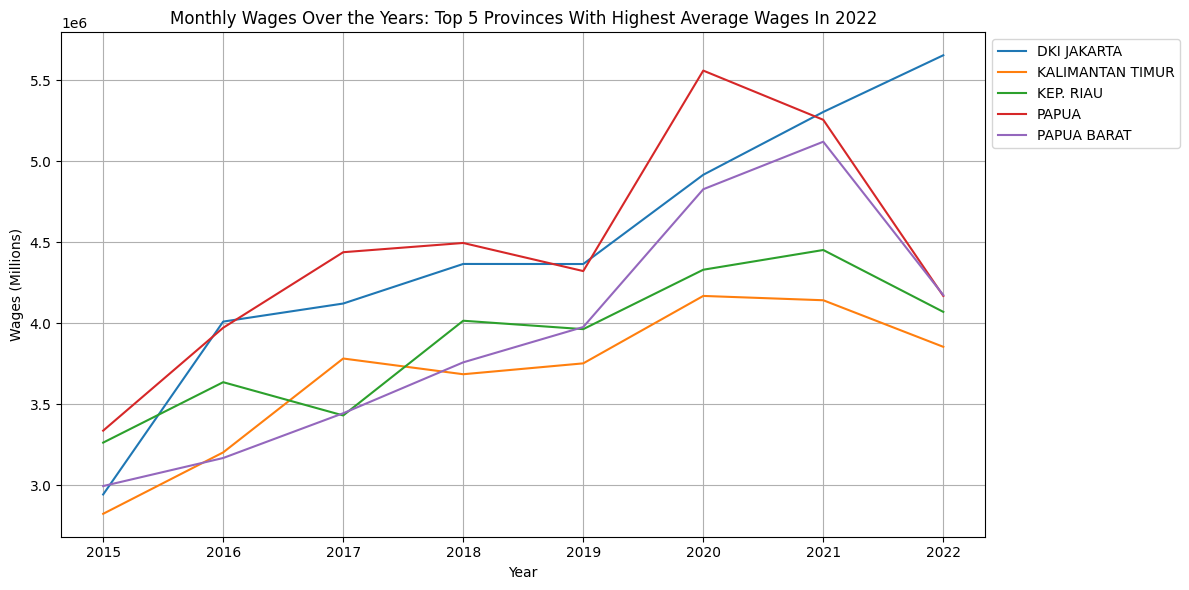

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Wages csv file
df = pd.read_csv('upah_cleaned.csv')

# Convert wages from per hour to per month based on 173 hours per month for full-time work
df['upah'] = df['upah'] * 173
top_and_bottom_wages = []

# Group the data by province
grouped = df.groupby('provinsi')

# Calculate the mean wages per month for each province
province_mean_wages = grouped['upah'].mean()

# Sort the provinces by mean wages in descending order to find top 5
top_5_provinces = province_mean_wages.nlargest(5)

# Get the data for top 5 highest and lowest 5 provinces
top_5_data = df[df['provinsi'].isin(top_5_provinces.index)]

# Step 5: Create line charts for top 5 highest and lowest 5 provinces
import matplotlib.pyplot as plt

# Plotting for top 5 highest wages
plt.figure(figsize=(12, 6))
for province, data in top_5_data.groupby('provinsi'):
    plt.plot(data['year'], data['upah'], label=province)
plt.title('Monthly Wages Over the Years: Top 5 Provinces With Highest Average Wages In 2022')
plt.xlabel('Year')
plt.ylabel('Wages (Millions)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

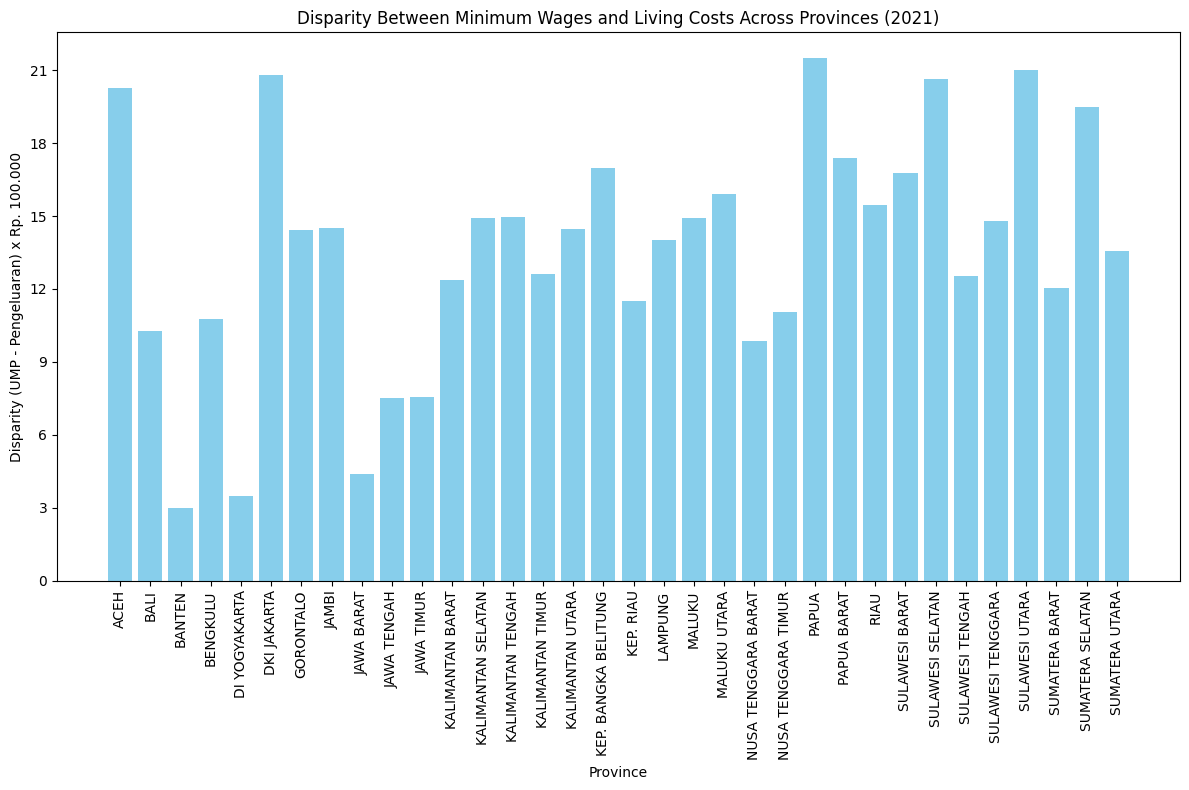

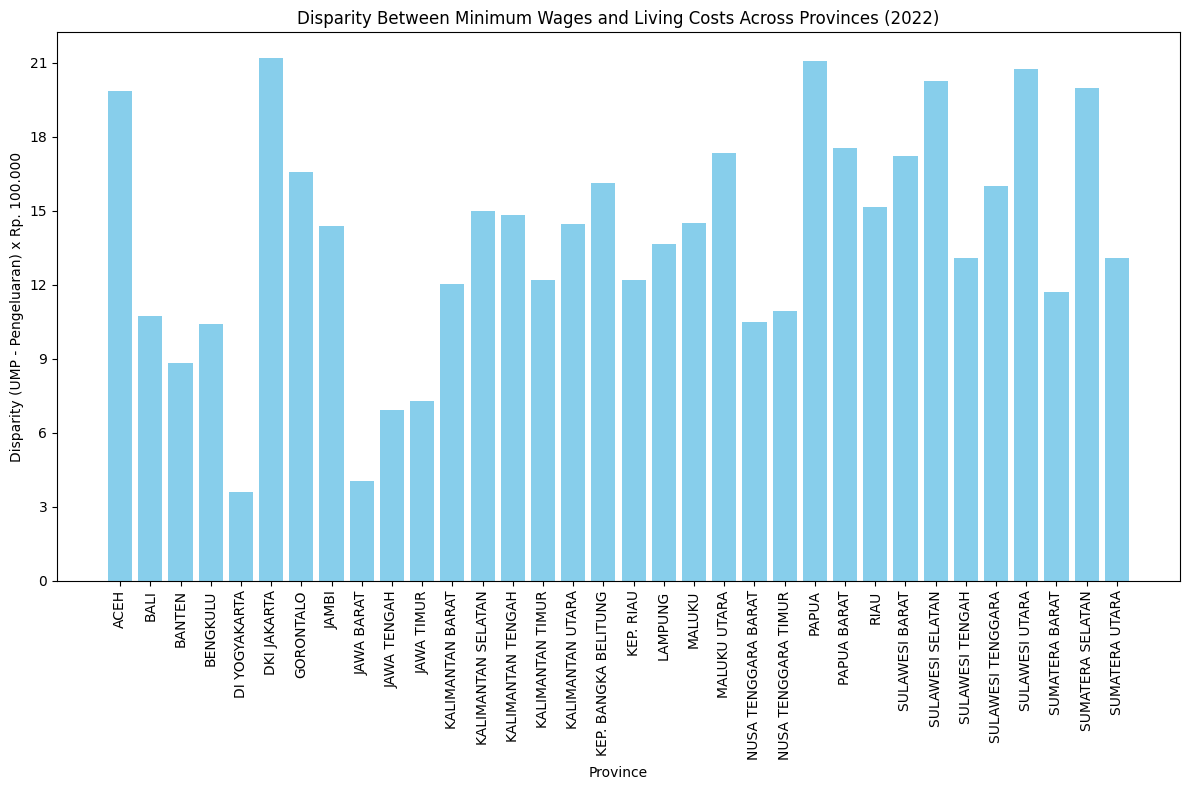

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
ump_df = pd.read_csv('ump_cleaned_fixed.csv')
peng_df = pd.read_csv('peng_cleaned.csv')

# Merge the datasets on 'provinsi' and 'year'
merged_df = pd.merge(ump_df, peng_df, on=['provinsi', 'year'])

# Calculate the disparity between UMP and Pengeluaran
merged_df['disparity'] = merged_df['ump'] - merged_df['pengeluaran']

# Filter the data for the years 2020, 2021, and 2022
years = [2021, 2022]
filtered_df = merged_df[merged_df['year'].isin(years)]

# Group by 'provinsi' and 'year' and calculate the mean disparity
mean_disparity = filtered_df.groupby(['provinsi', 'year'])['disparity'].mean().reset_index()

# Plot separate bar charts for each year
for year in years:
    year_data = mean_disparity[mean_disparity['year'] == year]
    plt.figure(figsize=(12, 8))
    plt.bar(year_data['provinsi'], year_data['disparity'], color='skyblue')
    plt.xlabel('Province')
    plt.ylabel('Disparity (UMP - Pengeluaran) x Rp. 100.000')
    plt.title(f'Disparity Between Minimum Wages and Living Costs Across Provinces ({year})')
    plt.xticks(rotation=90)

    # Set y-axis ticks at intervals of 300,000 and customize labels
    y_ticks = range(0, int(max(mean_disparity['disparity']))+1, 300000)
    y_tick_labels = [f'{tick/100000:.0f}' for tick in y_ticks]
    plt.yticks(y_ticks, y_tick_labels)

    plt.tight_layout()
    plt.show()


<ipython-input-11-629206e472b9>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['wages_left_percentage'] = (filtered_df['pengeluaran'] / filtered_df['ump']) * 100


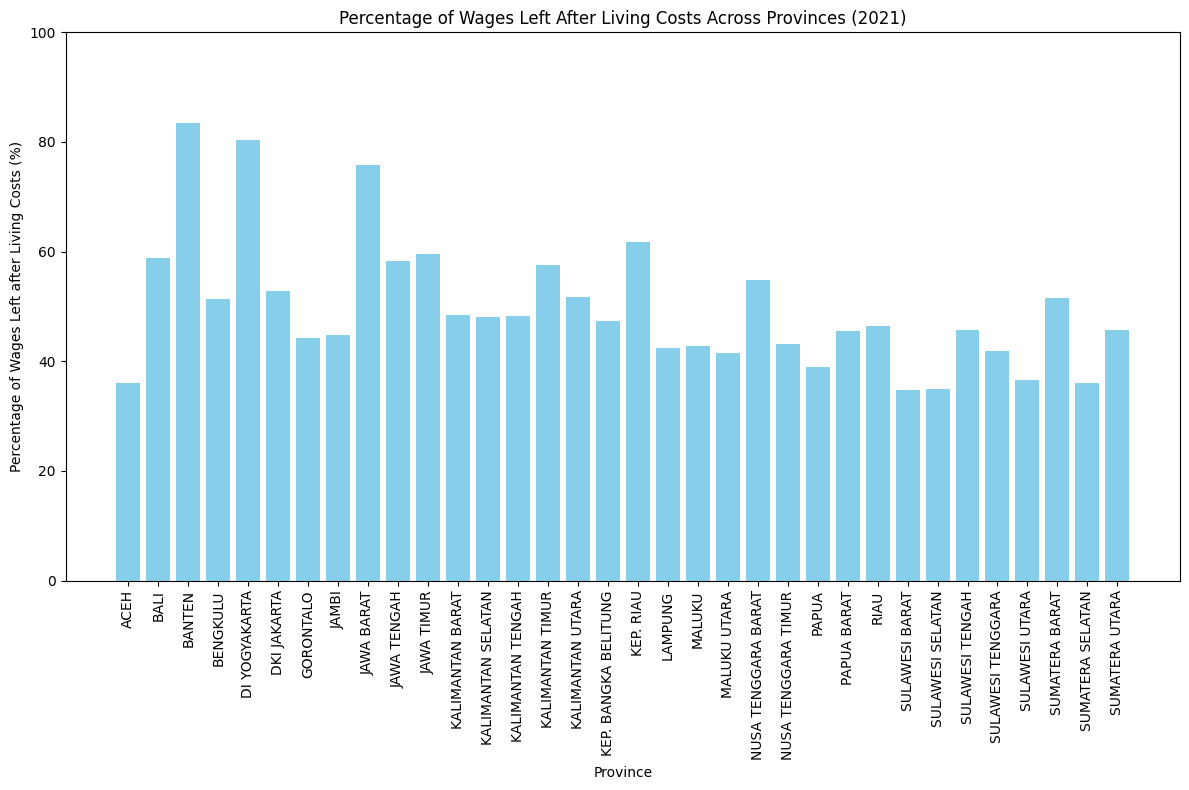

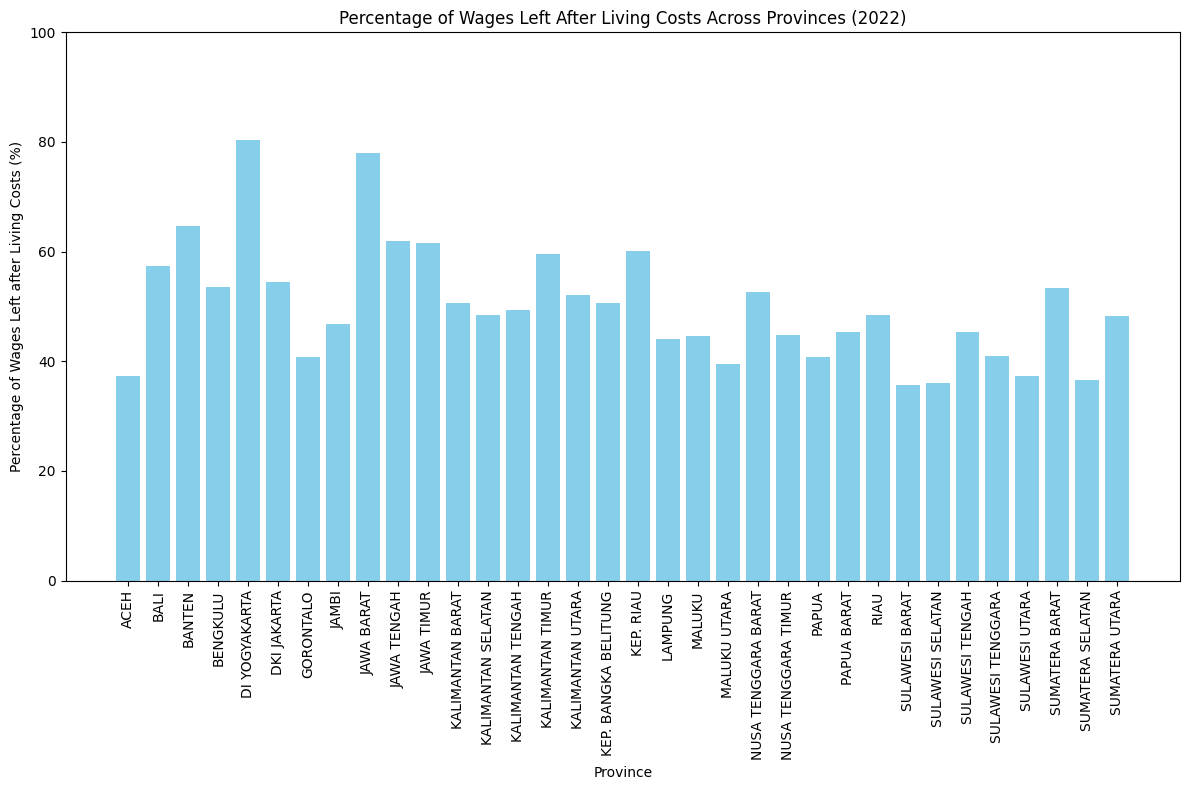

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
ump_df = pd.read_csv('ump_cleaned_fixed.csv')
peng_df = pd.read_csv('peng_cleaned.csv')

# Merge the datasets on 'provinsi' and 'year'
merged_df = pd.merge(ump_df, peng_df, on=['provinsi', 'year'])

# Calculate the disparity between UMP and Pengeluaran
merged_df['disparity'] = merged_df['ump'] - merged_df['pengeluaran']

# Filter the data for the years 2021 and 2022
years = [2021, 2022]
filtered_df = merged_df[merged_df['year'].isin(years)]

# Calculate the percentage of wages remaining after deducting living costs
filtered_df['wages_left_percentage'] = (filtered_df['pengeluaran'] / filtered_df['ump']) * 100

# Group by 'provinsi' and 'year' and calculate the mean percentage of wages left
mean_wages_left = filtered_df.groupby(['provinsi', 'year'])['wages_left_percentage'].mean().reset_index()

# Plotting for 2021
plt.figure(figsize=(12, 8))
year_2021_data = mean_wages_left[mean_wages_left['year'] == 2021]
plt.bar(year_2021_data['provinsi'], year_2021_data['wages_left_percentage'], color='skyblue')
plt.xlabel('Province')
plt.ylabel('Percentage of Wages Left after Living Costs (%)')
plt.title('Percentage of Wages Left After Living Costs Across Provinces (2021)')
plt.xticks(rotation=90)
plt.ylim(0, 100)  # Set y-axis limit to reach 100
plt.tight_layout()
plt.show()

# Plotting for 2022
plt.figure(figsize=(12, 8))
year_2022_data = mean_wages_left[mean_wages_left['year'] == 2022]
plt.bar(year_2022_data['provinsi'], year_2022_data['wages_left_percentage'], color='skyblue')
plt.xlabel('Province')
plt.ylabel('Percentage of Wages Left after Living Costs (%)')
plt.title('Percentage of Wages Left After Living Costs Across Provinces (2022)')
plt.xticks(rotation=90)
plt.ylim(0, 100)  # Set y-axis limit to reach 100%
plt.tight_layout()
plt.show()

This chart displays the percentage of wages remaining after deducting living costs for each province, covering the years 2021 and 2022.

The percentage represents the portion of the minimum wages (UMP) that individuals retain after covering essential living expenses.

A higher percentage suggests that a larger portion of wages is available for discretionary spending or savings, indicating better affordability and potentially higher standards of living. Conversely, a lower percentage indicates that a significant portion of wages is allocated towards covering living costs, potentially leading to financial strain or reduced purchasing power.

Therefore, provinces with higher percentages may be perceived as offering better economic opportunities and improved financial well-being for residents.

<ipython-input-12-c71701c3c2db>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['wages_left_percentage'] = (filtered_df['pengeluaran'] / filtered_df['ump']) * 100


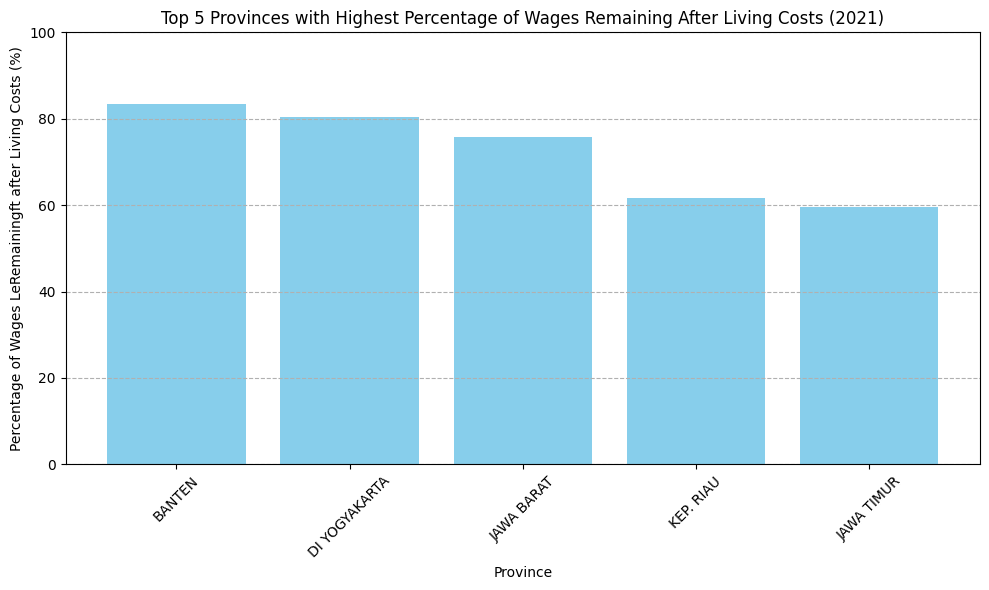

<ipython-input-12-c71701c3c2db>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['wages_left_percentage'] = (filtered_df['pengeluaran'] / filtered_df['ump']) * 100


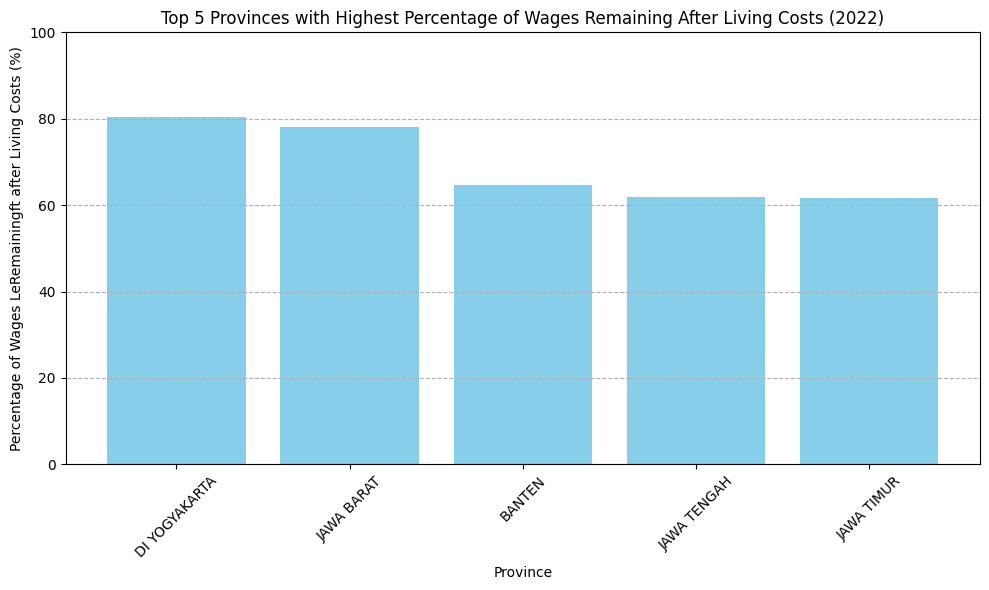

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the minimum wages and living cost file
ump_df = pd.read_csv('ump_cleaned_fixed.csv')
peng_df = pd.read_csv('peng_cleaned.csv')

# Merge the datasets on 'provinsi' and 'year'
merged_df = pd.merge(ump_df, peng_df, on=['provinsi', 'year'])

# Calculate the disparity between minimum wages and living cost file
merged_df['disparity'] = merged_df['ump'] - merged_df['pengeluaran']

# Filter the data for the years 2021 and 2022
years = [2021, 2022]
for year in years:
    filtered_df = merged_df[merged_df['year'] == year]

    # Calculate the percentage of wages remaining
    filtered_df['wages_left_percentage'] = (filtered_df['pengeluaran'] / filtered_df['ump']) * 100

    # Group by 'provinsi' and 'year' and calculate the mean percentage of wages remaining
    mean_wages_left = filtered_df.groupby(['provinsi', 'year'])['wages_left_percentage'].mean().reset_index()

    # Sort the mean_wages_left DataFrame by the wages_left_percentage in descending order
    sorted_df = mean_wages_left.sort_values(by='wages_left_percentage', ascending=False)

    # Get the top 5 provinces with the highest percentage of wages left after living costs
    top_5_highest = sorted_df.head(5)

    # Plotting for the top 5 provinces with the highest percentage of wages left after living costs
    plt.figure(figsize=(10, 6))
    plt.bar(top_5_highest['provinsi'], top_5_highest['wages_left_percentage'], color='skyblue')
    plt.xlabel('Province')
    plt.ylabel('Percentage of Wages LeRemainingft after Living Costs (%)')
    plt.title(f'Top 5 Provinces with Highest Percentage of Wages Remaining After Living Costs ({year})')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)  # Set y-axis limit to reach 100
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()


This chart showcases the top 5 provinces where the percentage of remaining wages after covering living costs is most favorable.

In [13]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the living cost csv
peng_df = pd.read_csv('peng_cleaned.csv')

# Get unique provinces
provinces = peng_df['provinsi'].unique()

# Create an empty DataFrame to store forecasted values
forecast_df = pd.DataFrame(columns=['provinsi', 'year', 'pengeluaran'])

# Loop through each province
for province in provinces:
    # Filter data for the province and up to the year 2022
    province_df = peng_df[(peng_df['provinsi'] == province) & (peng_df['year'] <= 2022)]

    # Fit SARIMAX model for forecasting
    model = SARIMAX(province_df['pengeluaran'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit()

    # Forecast living cost for the province for the next 3 years
    forecast_values = results.get_forecast(steps=3)
    forecasted_mean = forecast_values.predicted_mean.round()

    # Create DataFrame for forecasted values
    forecast_province_df = pd.DataFrame({
        'provinsi': [province] * 3,
        'year': [2023, 2024, 2025],
        'pengeluaran': forecasted_mean
    })

    # Append forecasted values to the main DataFrame
    forecast_df = forecast_df.append(forecast_province_df, ignore_index=True)

# Save the forecast DataFrame to a CSV file
forecast_df.to_csv('forecasted_pengeluaran_2023_2025.csv', index=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
<ipython-input-13-904a30bc2467>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_df = forecast_df.append(forecast_province_df, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

In [14]:
import pandas as pd

# Load the forecast living cost 2023 to 2025
df = pd.read_csv('forecasted_pengeluaran_2023_2025.csv')

# Filter the data for the year 2023
filtered_df = df[df['year'] == 2023]

# Save the filtered data to a new CSV file
filtered_df.to_csv('filtered_peng_2023.csv', index=False)

In [15]:
import pandas as pd

# Load the forecasted and real 2023 data
forecast_df = pd.read_csv('filtered_peng_2023.csv')
real_df = pd.read_csv('pengeluaran_2023.csv')

# Drop the 'year' column
forecast_df.drop(columns=['year'], inplace=True)

# Convert 'pengeluaran' columns to integers
forecast_df['pengeluaran'] = forecast_df['pengeluaran'].astype(int)
real_df['pengeluaran'] = real_df['pengeluaran'].astype(int)

# Merge the DataFrames on 'provinsi'
merged_df = pd.merge(forecast_df, real_df, on='provinsi', suffixes=('_forecasted', '_real'))

# Check for NaN values
print("NaN values in the merged DataFrame:")
print(merged_df.isna().sum())

# Print the merged DataFrame
print("\nMerged DataFrame:")
print(merged_df)

# Calculate the percentage difference
merged_df['percentage_difference'] = ((merged_df['pengeluaran_forecasted'] - merged_df['pengeluaran_real']) / merged_df['pengeluaran_real']) * 100

# Calculate the absolute difference (ensuring negative values are converted to positive)
merged_df['absolute_difference'] = abs(merged_df['pengeluaran_forecasted'] - merged_df['pengeluaran_real'])

# Calculate the average percentage difference
average_percentage_difference = abs(merged_df['percentage_difference'].mean())

# Calculate the average absolute difference
average_absolute_difference = merged_df['absolute_difference'].mean()

# Print average percentage difference and average absolute difference
print("\nAverage percentage difference between forecasted and real values: {:.2f}%".format(average_percentage_difference))
print("Average absolute difference between forecasted and real values: {:.2f}".format(average_absolute_difference))


NaN values in the merged DataFrame:
provinsi                  0
pengeluaran_forecasted    0
pengeluaran_real          0
dtype: int64

Merged DataFrame:
                provinsi  pengeluaran_forecasted  pengeluaran_real
0                   ACEH                 1457160           1225976
1                   BALI                 1835420           1741523
2                 BANTEN                 1966565           1743687
3               BENGKULU                 1462829           1332558
4          DI YOGYAKARTA                 1792896           1731560
5            DKI JAKARTA                 3203191           2791716
6              GORONTALO                 1401120           1228893
7                  JAMBI                 1555229           1424125
8             JAWA BARAT                 1741748           1567666
9            JAWA TENGAH                 1353747           1209906
10            JAWA TIMUR                 1408350           1323486
11      KALIMANTAN BARAT                 152

The Average Deviation is 12.52% which is moderate deviation

In [16]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the minimum wages csv
ump_df = pd.read_csv('ump_cleaned_fixed.csv')

# Get unique provinces
provinces = ump_df['provinsi'].unique()

# Create an empty DataFrame to store forecasted values
forecast_df = pd.DataFrame(columns=['provinsi', 'year', 'ump'])

# Loop through each province
for province in provinces:
    # Filter data for the province from 2015 up to the year 2022
    province_df = ump_df[(ump_df['provinsi'] == province) & (ump_df['year'] >= 2015) & (ump_df['year'] <= 2022)]

    # Fit SARIMAX model for forecasting
    model = SARIMAX(province_df['ump'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 8))
    results = model.fit()

    # Forecast living cost for the province for the next 3 years
    forecast_values = results.get_forecast(steps=3)
    forecasted_mean = forecast_values.predicted_mean.round()

    # Create DataFrame for forecasted values
    forecast_province_df = pd.DataFrame({
        'provinsi': [province] * 3,
        'year': [2023, 2024, 2025],
        'ump': forecasted_mean
    })

    # Append forecasted values to the main DataFrame
    forecast_df = forecast_df.append(forecast_province_df, ignore_index=True)

# Save the forecast DataFrame to a CSV file
forecast_df.to_csv('forecasted_ump_2023_2025.csv', index=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/b

In [17]:
import pandas as pd

# Load the 2023 to 205 minimum wages forecast
df = pd.read_csv('forecasted_ump_2023_2025.csv')

# Filter the data for the year 2023
filtered_df = df[df['year'] == 2023]

# Save the filtered data to a new CSV file
filtered_df.to_csv('filtered_ump_2023.csv', index=False)

In [18]:
import pandas as pd

# Load the forecasted and real 2023 data
forecast_df = pd.read_csv('filtered_ump_2023.csv')
real_df = pd.read_csv('ump_2023.csv')


# Drop the 'year' column
forecast_df.drop(columns=['year'], inplace=True)

# Convert 'ump' columns to integers
forecast_df['ump'] = forecast_df['ump'].astype(int)
real_df['ump'] = real_df['ump'].astype(int)

merged_df = pd.merge(forecast_df, real_df, on='provinsi', suffixes=('_forecasted', '_real'))

# Check for NaN values
print("NaN values in the merged DataFrame:")
print(merged_df.isna().sum())

# Print the merged DataFrame
print("\nMerged DataFrame:")
print(merged_df)

# Calculate the percentage difference
merged_df['percentage_difference'] = ((merged_df['ump_forecasted'] - merged_df['ump_real']) / merged_df['ump_real']) * 100

# Calculate the absolute difference (ensuring negative values are converted to positive)
merged_df['absolute_difference'] = abs(merged_df['ump_forecasted'] - merged_df['ump_real'])


# Calculate the average percentage difference
average_percentage_difference = abs(merged_df['percentage_difference'].mean())

# Calculate the average absolute difference
average_absolute_difference = merged_df['absolute_difference'].mean()

# Print average percentage difference and average absolute difference
print("\nAverage percentage difference between forecasted and real values: {:.2f}%".format(average_percentage_difference))
print("Average absolute difference between forecasted and real values: {:.2f}".format(average_absolute_difference))

NaN values in the merged DataFrame:
provinsi          0
ump_forecasted    0
ump_real          0
dtype: int64

Merged DataFrame:
                provinsi  ump_forecasted  ump_real
0                   ACEH         3214092   3413666
1                   BALI         2589998   2713672
2                 BANTEN         2276772   2661280
3               BENGKULU         2292193   2418280
4          DI YOGYAKARTA         1664136   2025046
5            DKI JAKARTA         4955281   4901798
6              GORONTALO         2802298   2983350
7                  JAMBI         2794320   2943000
8             JAWA BARAT         1962147   1986670
9            JAWA TENGAH         1451104   1958169
10            JAWA TIMUR         1673039   2040244
11      KALIMANTAN BARAT         2510477   2608601
12    KALIMANTAN SELATAN         2992335   3149977
13     KALIMANTAN TENGAH         3012002   3181013
14      KALIMANTAN TIMUR         3095885   3201396
15      KALIMANTAN UTARA         3085277   3251702
16  K

The Average Deviation is 5.64% which is moderate deviation

<ipython-input-19-197f2dea1bfd>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['wages_left_percentage'] = (filtered_df['pengeluaran'] / filtered_df['ump']) * 100


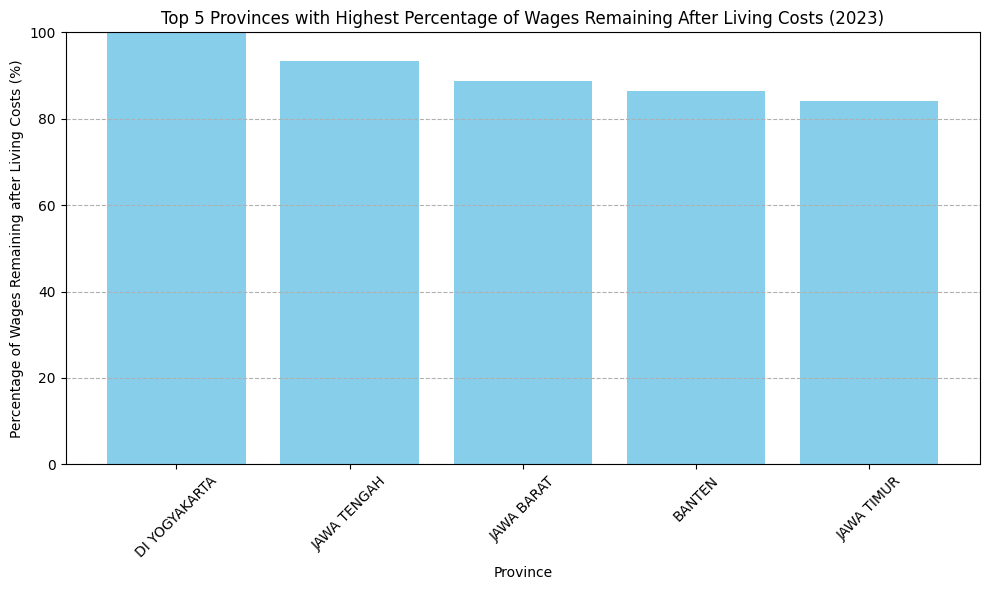

<ipython-input-19-197f2dea1bfd>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['wages_left_percentage'] = (filtered_df['pengeluaran'] / filtered_df['ump']) * 100


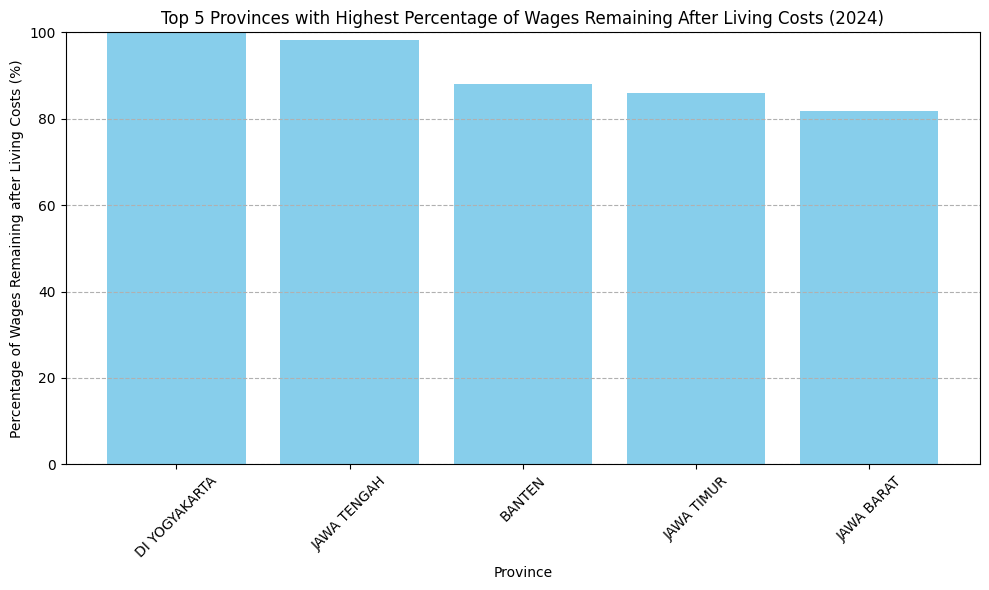

<ipython-input-19-197f2dea1bfd>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['wages_left_percentage'] = (filtered_df['pengeluaran'] / filtered_df['ump']) * 100


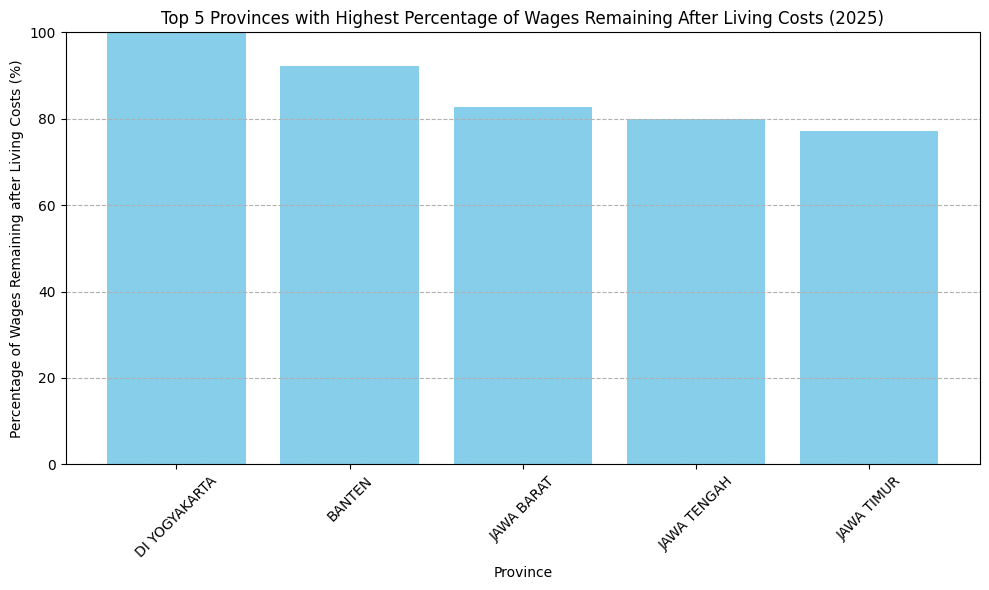

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the forecasted csv files
ump_df = pd.read_csv('forecasted_ump_2023_2025.csv')
peng_df = pd.read_csv('forecasted_pengeluaran_2023_2025.csv')

# Merge the datasets on 'provinsi' and 'year'
merged_df = pd.merge(ump_df, peng_df, on=['provinsi', 'year'])

# Calculate the disparity
merged_df['disparity'] = merged_df['ump'] - merged_df['pengeluaran']

# Filter the data for the years 2023 to 2025
years = [2023, 2024, 2025]
for year in years:
    filtered_df = merged_df[merged_df['year'] == year]

    # Calculate the percentage of wages remaining
    filtered_df['wages_left_percentage'] = (filtered_df['pengeluaran'] / filtered_df['ump']) * 100

    # Group by 'provinsi' and 'year' and calculate the mean percentage of wages remaining
    mean_wages_left = filtered_df.groupby(['provinsi', 'year'])['wages_left_percentage'].mean().reset_index()

    # Sort the mean_wages_left DataFrame by the wages_left_percentage in descending order
    sorted_df = mean_wages_left.sort_values(by='wages_left_percentage', ascending=False)

    # Get the top 5 provinces with the highest percentage
    top_5_highest = sorted_df.head(5)

    # Plotting for the top 5 provinces with the highest percentage
    plt.figure(figsize=(10, 6))
    plt.bar(top_5_highest['provinsi'], top_5_highest['wages_left_percentage'], color='skyblue')
    plt.xlabel('Province')
    plt.ylabel('Percentage of Wages Remaining after Living Costs (%)')
    plt.title(f'Top 5 Provinces with Highest Percentage of Wages Remaining After Living Costs ({year})')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)  # Set y-axis limit to reach 100
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()


The chart display the top 5 provinces with  the percentage of wages that remain after accounting for living costs across different provinces. <br>
The standard deviation of the forecasted minimum wages is 5.64%, indicating the variability or spread of the forecasted wages around the mean value.<br>
Similarly, the standard deviation of the living costs is 12.54%, representing the variability in the living expenses across provinces.